<a href="https://colab.research.google.com/github/kKawsarAlam/Regression-Analysis/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Polynomial Regression**   

Polynomial regression is a type of machine learning regression analysis that models non-linear relationships between independent (x) and dependent (y) variables by fitting a polynomial equation (y = Bo + B1 * x + B2 * x^2 +..+Bn * x^n) to the data. It is an extension of linear regression that allows for curved lines to fit complex data patterns better than a straight line.    
The polynomial regression model can be represent as:  
y = Bo + B1 * x + B2 * x^2 + B3 * x^3 +...+ Bn * x^n  
Where,   
  y is the independent variable  
  x is the dependent variable    
  Bo,B1,B2,...Bn, is the coefficients of the model (with Bo being the intercept)  
  n is the degree of polynomial  
    
Total features count = (n+d)! / n! * d!  
Suppose,  
features = 3  
digree = 2  
total features = (3 + 2)! / 3! * 2!  = 5! / 3! * 2! = 10  
Therefore, it will be 10 features, this means it can recognize more complex pattern.


In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Load linear dataset
df1 = pd.read_csv('/content/linear_data.csv')
df1.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [11]:
x_linear = df1[['x']]
y_linear = df1[['y']]

In [12]:
# Load non-linear dataset
df2 = pd.read_csv('/content/nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [34]:
df2.shape

(500, 2)

In [13]:
x_non_linear = df2[['x']]
y_non_linear = df2[['y']]

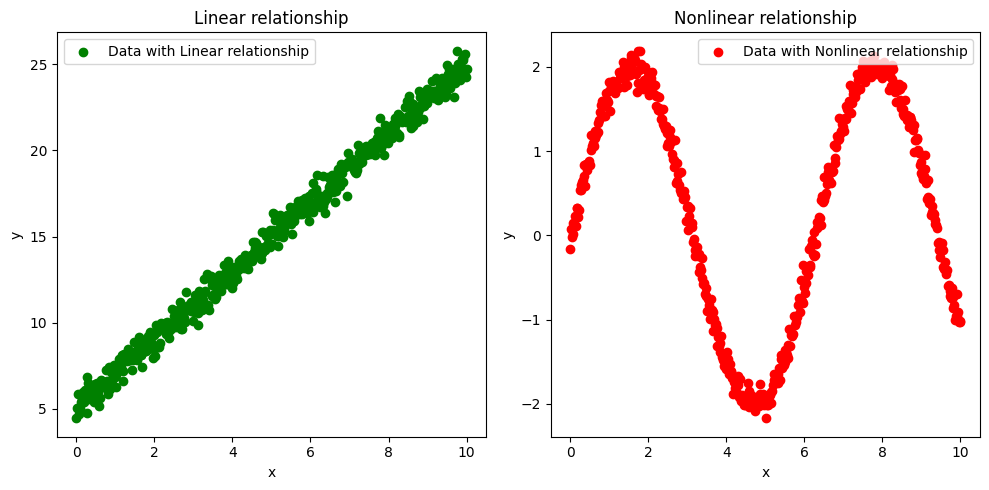

In [15]:
# For linear
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_linear, y_linear, color = 'green', label = 'Data with Linear relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear relationship')
plt.legend()

# For nonlinear
plt.subplot(1, 2, 2)
plt.scatter(x_non_linear, y_non_linear, color = 'red', label = 'Data with Nonlinear relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear relationship')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# For linear dataset, it shown positive correlation
df1.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [18]:
# For nonlinear dataset, it shown negative correlation
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
model.fit(x_linear, y_linear)

LinearRegression()

In [23]:
# For linear dataset
model.score(x_linear, y_linear)

0.9928923730526016

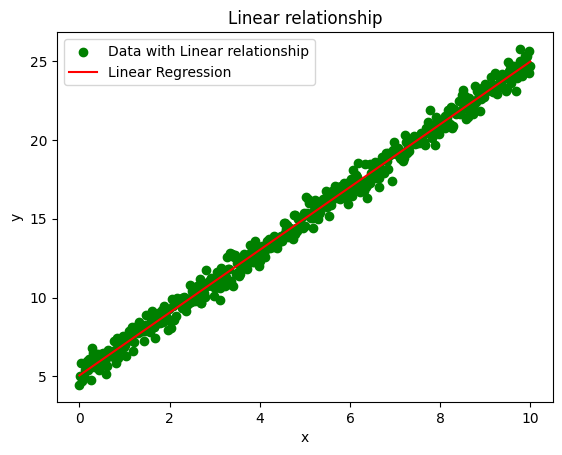

In [24]:
# For linear dataset
plt.scatter(x_linear, y_linear, color = 'green', label = 'Data with Linear relationship')
plt.plot(x_linear, model.predict(x_linear), color = 'red', label = 'Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear relationship')
plt.legend()

In [25]:
# Fit LinearRegression model for nonlinear dataset
model2 = LinearRegression()
model2.fit(x_non_linear, y_non_linear)

LinearRegression()

In [26]:
# Found score and we can see Linear regression perform very poor(o.o4%) for nonlinear dataset
model2.score(x_non_linear, y_non_linear)

0.004321199719043656

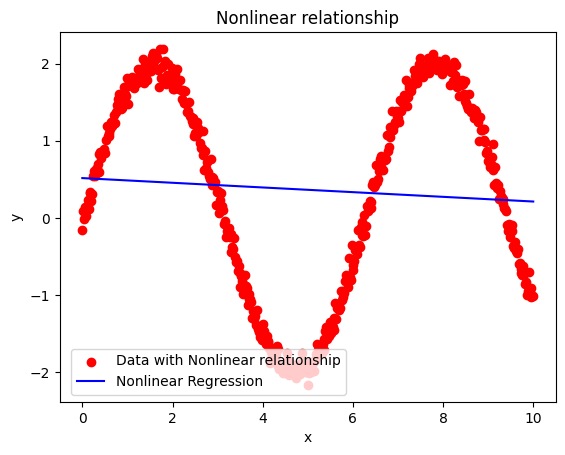

In [51]:
# Plot the best fit line
plt.scatter(x_non_linear, y_non_linear, color = 'red', label = 'Data with Nonlinear relationship')
plt.plot(x_non_linear, model2.predict(x_non_linear), color = 'blue', label = 'Nonlinear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear relationship')
plt.legend(loc='lower center', bbox_to_anchor=(0.3, 0))

Therefore, for a nonlinear relationship dataset, simple linear regression may not perform well. In such cases, polynomial regression can be used to capture the nonlinear relationship.

In [29]:
# For polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)   # if you change the value of degree, score will increase or decrease. you have to choose the best value

In [31]:
x_poly = poly.fit_transform(x_non_linear)

In [35]:
# Using a 6th-degree polynomial, we obtained 7 features.
x_poly.shape

(500, 7)

In [36]:
model_poly = LinearRegression()
model_poly.fit(x_poly, y_non_linear)

LinearRegression()

In [37]:
model_poly.score(x_poly, y_non_linear)

0.993062484449735

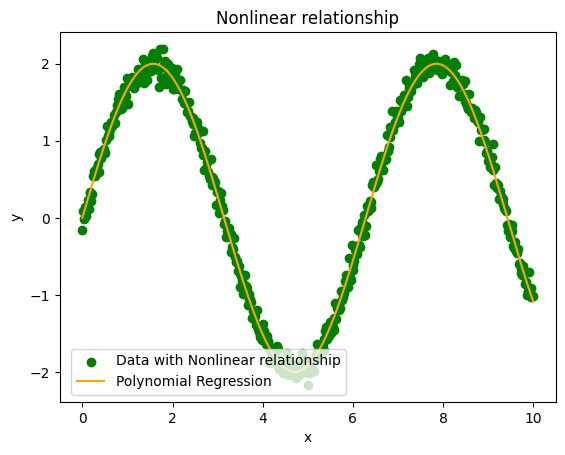

In [52]:
# plot polynomial regression
plt.scatter(x_non_linear, y_non_linear, color = 'green', label = 'Data with Nonlinear relationship')
plt.plot(x_non_linear, 2 * np.sin(x_non_linear), color = 'orange', label = 'Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear relationship')
plt.legend(loc='lower center', bbox_to_anchor=(0.3, 0))

In [46]:
# Seperate Train, Test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_poly, y_non_linear, test_size = 30, random_state = 1 )

In [47]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [44]:
reg.score(x_train, y_train)

0.993215771683891

In [45]:
# Test with unseen data.

reg.score(x_test, y_test)

0.9895406823639311

After testing, we observe that this model performs best for the nonlinear relationship. It shows no significant underfitting or overfitting.